In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

# Banking Application Model
### Ever Nolasco

We will consider three different banks in Madison, NJ - each offering a different method of interest calculation.
* Chase Bank
* Lakeland Bank
* PNC Bank

Chase and Lakeland banks offer the same interest rate (3%) on checking accounts but compute and pay interest differently. At Chase, interest is computed and paid at the end of each year (annual compounding), and at Lakeland interest is compounded continuously.
At Chase, if you deposit p<sub>0</sub> dollars at the beginning of Year 0, the balance of your account at the end of Year n is:<br>
    x<sub>n</sub> = p<sub>0</sub>(1 + a)<sup>n</sup> where a = 0.03<br>
Note: n is number of compounding periods or number of years as interest is compounded annually.<br>
At Lakeland, your balance at any time t would be:<br> x(t) = p<sub>0</sub>e<sup>at</sup> where t is time in years

<b>1) If you deposit $1,000 at each bank at the beginning of Year 0, how much would you have in each account (Chase and Lakeland banks) after 10 years?</b>

In [8]:
#Variables will hold starting time and end time in years
t_0 = 0
t_end = 10

#Amount of money in dollars at year 0 and interest rate
p0 = 1000
a = 0.03

#Arrays that will hold the money values for each year for each bank
Chase = TimeSeries()
Lakeland = TimeSeries()

,values


In [16]:
#linrange used generate an array of 11 different years from 0 to 10 
#The above formulas are used for each respective bank
for t in linrange(t_0, t_end, endpoint=True):
    Chase[t] = p0*((1+a)**t)
    Lakeland[t] = p0*exp(a*t)

In [17]:
Chase

,values
0,1000.000000
1,1030.000000
2,1060.900000
3,1092.727000
4,1125.508810
5,1159.274074
6,1194.052297
7,1229.873865
8,1266.770081
9,1304.773184


In [18]:
Lakeland

,values
0,1000.000000
1,1030.454534
2,1061.836547
3,1094.174284
4,1127.496852
5,1161.834243
6,1197.217363
7,1233.678060
8,1271.249150
9,1309.964451


<b>2) Plot the Time (in years) on x axis and the Value (in dollars) on the y axis with appropriate legend for Chase and Lakeland banks.</b>

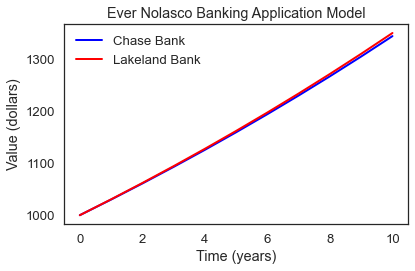

In [19]:
#Plot both arrays
plot(Chase, color="blue", label="Chase Bank")
plot(Lakeland, color="red", label="Lakeland Bank")
decorate(title="Ever Nolasco Banking Application Model", xlabel="Time (years)", ylabel="Value (dollars)")

<b>3) Is there an interest rate Chase could pay so that your balance at the end of each year would be the same at both banks? What is this a_new?</b>

Yes. This is possible if we isolate a in:<br><br>

x<sub>n</sub> = p<sub>0</sub>(1 + a)<sup>n</sup> where a = 0.03<br><br>

and make x<sub>n</sub> = Lakeland[n]. This way, we can solve for a and get the interest rate that will make Chase[n] = Lakeland[n]<br><br>

So if we isolate a, we get this equation:<br><br>

a = (x<sub>n</sub>/p<sub>0</sub>)<sup>1/n</sup> - 1 <br><br>

In [22]:
#Variables we will be using in the new equation
x2 = Lakeland[2]
n = 2

a_new = (x2/p0)**(1/n) - 1

0.030454533953516938

In [24]:
#Create an alternate array for Chase and we will use a_new as the interest rate
Chase_alt = TimeSeries()

for t in linrange(t_0, t_end, endpoint=True):
    Chase_alt[t] = p0*((1+a_new)**t)

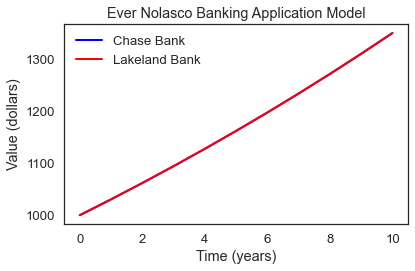

In [25]:
#Plot both arrays
plot(Chase_alt, color="blue", label="Chase Bank")
plot(Lakeland, color="red", label="Lakeland Bank")
decorate(title="Ever Nolasco Banking Application Model", xlabel="Time (years)", ylabel="Value (dollars)")

As we can see from the chart above, the new interest rate for Chase Bank, a=0.030454533953516938, works to make the balance at the end of each year for Chase and Lakeland Bank the same.<br><br><br>


Furthermore, In order to compete with Chase Bank and Lakeland Bank, PNC Bank offers a parabolic savings account where the balance is a polynomial function of time given by:<br><br>

x(t) = p<sub>0</sub> + (B<sub>1</sub> * t) + (B<sub>2</sub>*t<sup>2</sup>) with B<sub>1</sub> = 30 and B<sub>2</sub> = 0.5<br><br>

<b>4) Suppose you deposit $1,000 at all the three banks at the beginning of Year 0. How much would you have in each account at the end of Year 10? How about Year 20? And Year 100? Which bank pays the highest interest?</b>

In [31]:
#An array to hold PNC values
PNC = TimeSeries()

#Set the needed variables
B1 = 30
B2 = 0.5

#Change t_end from 10 to 100 years
t_end = 100

for t in linrange(t_0, t_end, endpoint=True):
    Chase[t] = p0*((1+a)**t)
    Lakeland[t] = p0*exp(a*t)
    PNC[t] = p0+(B1*t)+(B2*(t**2))

In [32]:
data = [[10, Chase[10], Lakeland[10], PNC[10]], [20, Chase[20], Lakeland[20], PNC[20]],
        [100, Chase[100], Lakeland[100], PNC[100]]]

df = pd.DataFrame(data, columns=['Year', 'Chase Bank', 'Lakeland Bank', 'PNC Bank'], dtype=float)
df

,Year,Chase Bank,Lakeland Bank,PNC Bank
0,10.0,1349.858808,1356.008339,1350.0
1,20.0,1822.118800,1838.758617,1800.0
2,100.0,20085.536923,21019.559213,9000.0


As we can see from the data frame above, Lakeland Bank pays a higher interest rate than the other two banks.<br><br>

<b>5) Make the plots (as in Q2) for all three banks for all the years from 0 to 100 with appropriate legend, appropriate axes labels and chart title.</b>

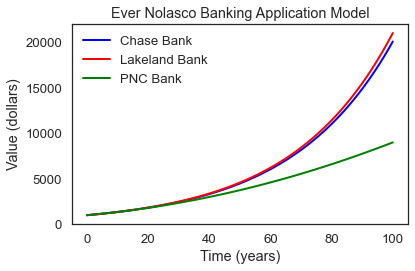

In [33]:
#Plot both arrays
plot(Chase, color="blue", label="Chase Bank")
plot(Lakeland, color="red", label="Lakeland Bank")
plot(PNC, color="green", label="PNC Bank")
decorate(title="Ever Nolasco Banking Application Model", xlabel="Time (years)", ylabel="Value (dollars)")